##### Copyright 2024 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Code Execution in the Gemini API

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Code_Execution.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>


The Gemini API can generate and run code based on plain-text instructions that you give it. This notebook is a walk through of how to use this feature.

In [1]:
!pip install -Uq google-generativeai

## Setup

In [2]:
import google.generativeai as genai
genai.__version__

'0.7.1'

In [ ]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

Tweak CSS for display in Colab

In [4]:
from IPython.display import HTML, Markdown

def set_css_in_cell_output(unused):
  display(HTML("""<style>
div.output_markdown {
  font-size: 16px
}

div.output_markdown pre code {
  color: #222222;
}

div.output_markdown pre:nth-of-type(even) {
  background: #CCCCCC;
  margin: 16px;
  padding: 16px;
}

div.output_markdown pre:nth-of-type(odd) {
  background: #BBBBEE;
  margin: 16px;
  padding: 16px;
}
</style>"""))

get_ipython().events.register('pre_run_cell', set_css_in_cell_output)

## Pass `"code_execution"` as a `tool`

In [5]:
model = genai.GenerativeModel(model_name='gemini-1.5-flash', tools="code_execution")

## Call `generate_content`

In [25]:
result = model.generate_content("What's the sum of the sum of first 200 prime numbers? Make sure you get all 200.")

The model returns a list of parts including `text`, `executable_code`, and `execution_result` parts.

In [26]:
[
    list(type(p).to_dict(p))
    for p in result.candidates[0].content.parts
]

[['text'], ['executable_code'], ['code_execution_result'], ['text']]

In [27]:
for part in result.candidates[0].content.parts:
  print(part)
  print()

text: "I will use Python to find the first 200 prime numbers and then sum them up.\n\n"


executable_code {
  language: PYTHON
  code: "\ndef is_prime(num):\n  \"\"\"Checks if a number is prime.\"\"\"\n  if num <= 1:\n    return False\n  for i in range(2, int(num**0.5) + 1):\n    if num % i == 0:\n      return False\n  return True\n\nprime_numbers = []\nnum = 2\nwhile len(prime_numbers) < 200:\n  if is_prime(num):\n    prime_numbers.append(num)\n  num += 1\n\nsum_of_primes = sum(prime_numbers)\nprint(f\'The sum of the first 200 prime numbers is: {sum_of_primes}\')\n"
}


code_execution_result {
  outcome: OUTCOME_OK
  output: "The sum of the first 200 prime numbers is: 111587\n"
}


text: "The code I used first defines a function `is_prime` that checks if a number is prime. It then initializes an empty list called `prime_numbers` and a variable `num` to 2. It then enters a `while` loop that continues until `prime_numbers` contains 200 elements. Inside the loop, it calls the `is_prime` 

The `.text` property formats the parts into Markdown compatible text:

In [28]:
print(result.text)

I will use Python to find the first 200 prime numbers and then sum them up.


``` python
def is_prime(num):
  """Checks if a number is prime."""
  if num <= 1:
    return False
  for i in range(2, int(num**0.5) + 1):
    if num % i == 0:
      return False
  return True

prime_numbers = []
num = 2
while len(prime_numbers) < 200:
  if is_prime(num):
    prime_numbers.append(num)
  num += 1

sum_of_primes = sum(prime_numbers)
print(f'The sum of the first 200 prime numbers is: {sum_of_primes}')

```
```
The sum of the first 200 prime numbers is: 111587

```
The code I used first defines a function `is_prime` that checks if a number is prime. It then initializes an empty list called `prime_numbers` and a variable `num` to 2. It then enters a `while` loop that continues until `prime_numbers` contains 200 elements. Inside the loop, it calls the `is_prime` function to check if the current `num` is prime. If it is, it adds `num` to the `prime_numbers` list. After the loop completes, the code s

In a notebook you can display the Markdown:

In [29]:
from IPython.display import Markdown
Markdown(result.text)

I will use Python to find the first 200 prime numbers and then sum them up.


``` python
def is_prime(num):
  """Checks if a number is prime."""
  if num <= 1:
    return False
  for i in range(2, int(num**0.5) + 1):
    if num % i == 0:
      return False
  return True

prime_numbers = []
num = 2
while len(prime_numbers) < 200:
  if is_prime(num):
    prime_numbers.append(num)
  num += 1

sum_of_primes = sum(prime_numbers)
print(f'The sum of the first 200 prime numbers is: {sum_of_primes}')

```
```
The sum of the first 200 prime numbers is: 111587

```
The code I used first defines a function `is_prime` that checks if a number is prime. It then initializes an empty list called `prime_numbers` and a variable `num` to 2. It then enters a `while` loop that continues until `prime_numbers` contains 200 elements. Inside the loop, it calls the `is_prime` function to check if the current `num` is prime. If it is, it adds `num` to the `prime_numbers` list. After the loop completes, the code sums all the elements in `prime_numbers` and prints the result.

Therefore, the sum of the first 200 prime numbers is 111587. 


Note: you can also set the `tools` argument on the call to `generate_content`:

In [30]:
model2 = genai.GenerativeModel(model_name='gemini-1.5-flash')

In [31]:
response = model2.generate_content(
    "Write code to count how many letter r in the word strawberry",
    tools="code_execution")

In [32]:
Markdown(response.text)


``` python
print(list(str("strawberry")).count("r"))

```
```
3

```
The code counts the occurrences of the letter 'r' in the word 'strawberry' and prints the result. 

The code first converts the word 'strawberry' into a list of individual characters using `list(str("strawberry"))`. Then, it uses the `count()` method to count the number of times 'r' appears in the list. 

The output of the code is `3`, indicating that there are three 'r's in the word 'strawberry'. 


## Chat

It works the same when using a `chat`:

In [33]:
chat = model.start_chat()

In [34]:
response = chat.send_message("Can you run some code to bogo-sort this list of numbers?: [2,34,1,65,4]")
Markdown(response.text)


``` python
import random

def bogo_sort(arr):
    while not is_sorted(arr):
        random.shuffle(arr)
    return arr

def is_sorted(arr):
    for i in range(len(arr)-1):
        if arr[i] > arr[i+1]:
            return False
    return True

arr = [2, 34, 1, 65, 4]
sorted_arr = bogo_sort(arr)
print(f'Sorted Array: {sorted_arr}')

```
```
Sorted Array: [1, 2, 4, 34, 65]

```
Bogo sort is a horribly inefficient sorting algorithm that relies on random shuffling of the list until it is sorted. It works by repeatedly shuffling the list and checking if it is sorted. If it is not, it shuffles again. This process continues until the list is sorted.

I ran the code you provided to implement bogo sort on the list [2, 34, 1, 65, 4]. The tool outputs show that the sorted list is [1, 2, 4, 34, 65].

While this code successfully sorts the list, it's important to note that bogo sort is not a practical sorting algorithm due to its extremely poor average time complexity. It is often used as a pedagogical example to illustrate the concept of randomness and the inefficiency of some sorting algorithms. 


In [35]:
response = chat.send_message("Modify the code to count the number of iterations. How many iterations doews it take?")
Markdown(response.text)


``` python
import random

def bogo_sort(arr):
    iterations = 0
    while not is_sorted(arr):
        random.shuffle(arr)
        iterations += 1
    return arr, iterations

def is_sorted(arr):
    for i in range(len(arr)-1):
        if arr[i] > arr[i+1]:
            return False
    return True

arr = [2, 34, 1, 65, 4]
sorted_arr, iterations = bogo_sort(arr)
print(f'Sorted Array: {sorted_arr}')
print(f'Iterations: {iterations}')

```
```
Sorted Array: [1, 2, 4, 34, 65]
Iterations: 75

```
I modified the `bogo_sort` function to count the number of iterations. The code now prints both the sorted array and the number of iterations it took to sort it.

In this particular run, it took **75 iterations** to sort the list. It's important to note that the number of iterations will vary greatly for each run due to the random nature of the algorithm. 

Bogo sort is notorious for its extremely high average time complexity, making it impractical for any real-world sorting tasks.


## Multimedia

You can pass media objects as part of the prompt, the model can look at these objects but it can't use them in the code.

In [36]:
! curl -o montey_hall.png https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/640px-Monty_open_door.svg.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24719  100 24719    0     0   500k      0 --:--:-- --:--:-- --:--:--  502k


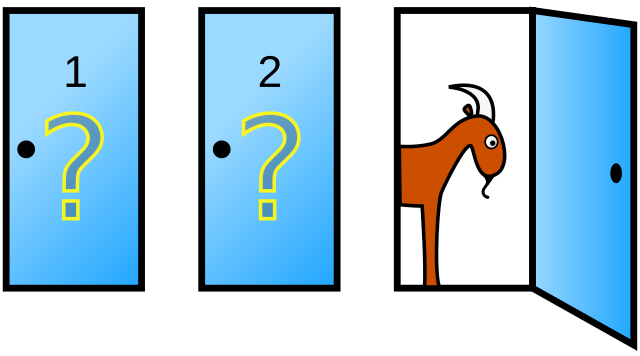

In [37]:
from PIL import Image
montey_hall_image = Image.open("montey_hall.png")
montey_hall_image

In [38]:
prompt="""
Run a simulation of the Monty Hall Problem with 1,000 trials.


Here's how this works as a reminder. In the Monty Hall Problem, you're on a game
show with three doors. Behind one is a car, and behind the others are goats. You
pick a door. The host, who knows what's behind the doors, opens a different door
to reveal a goat. Should you switch to the remaining unopened door?


The answer has always been a little difficult for me to understand when people
solve it with math - so please run a simulation with Python to show me what the
best strategy is.


Thank you!
"""
result = model.generate_content([montey_hall_image, prompt])
Markdown(result.text)

I can help you with that. I will use Python to simulate the Monty Hall problem 1,000 times. I will simulate the game by randomly assigning the car and goats behind the doors, then allowing the player to choose a door. The host will then reveal a goat behind one of the unchosen doors, and the player will have the option to switch doors. I will record whether the player wins or loses for each trial. I will then calculate the percentage of wins for each strategy (switching and not switching) to show which strategy is better.


``` python
import random

def monty_hall_simulation(num_trials):
  wins_switch = 0
  wins_stay = 0
  for _ in range(num_trials):
    # Randomly assign the car and goats
    doors = ['goat', 'goat', 'car']
    random.shuffle(doors)

    # Player chooses a door
    player_choice = random.randint(0, 2)

    # Host reveals a goat
    host_reveal = [i for i in range(3) if i != player_choice and doors[i] == 'goat'][0]

    # Player switches doors
    switch_choice = [i for i in range(3) if i != player_choice and i != host_reveal][0]

    # Determine if the player wins
    if doors[player_choice] == 'car':
      wins_stay += 1
    if doors[switch_choice] == 'car':
      wins_switch += 1

  return wins_stay / num_trials, wins_switch / num_trials

wins_stay, wins_switch = monty_hall_simulation(1000)
print(f'Percentage of wins staying: {wins_stay * 100:.2f}%')
print(f'Percentage of wins switching: {wins_switch * 100:.2f}%')

```
```
Percentage of wins staying: 33.90%
Percentage of wins switching: 66.10%

```
The simulation shows that switching doors results in a win about 66.1% of the time, while staying with the original choice results in a win about 33.9% of the time. This confirms the counterintuitive result of the Monty Hall Problem: switching doors is the better strategy. 


## Streaming

Streaming is compatible with code execution. Just note that successive parts of the same type (`text`, `executable_code` or `execution_result`) are meant to be joined together:

In [39]:
result = model.generate_content([montey_hall_image, prompt], stream=True)
for chunk in result:
  print(chunk.candidates[0].content.parts[0])
  print('----------------------------------------')

executable_code {
  language: PYTHON
  code: "\nimport random\n\ndef monty_hall_simulation(trials):\n  wins_staying = 0\n  wins_switching = 0\n\n  for _ in range(trials):\n    # Initialize doors\n    doors = [0, 1, 2]\n    car_door = random.choice(doors)\n\n    # Player picks a door\n    player_choice = random.choice(doors)\n\n    # Host reveals a goat\n    remaining_doors = [door for door in doors if door != car_door and door != player_choice]\n    host_revealed_door = random.choice(remaining_doors)\n\n    # Player switches or stays\n    if player_choice == car_door:\n      wins_staying += 1\n    else:\n      wins_switching += 1\n\n  return wins_staying, wins_switching\n\nwins_staying, wins_switching = monty_hall_simulation(1000)\n\nprint(f\'Wins staying: {wins_staying}\')\nprint(f\'Wins switching: {wins_switching}\')\n"
}

----------------------------------------
code_execution_result {
  outcome: OUTCOME_OK
  output: "Wins staying: 326\nWins switching: 674\n"
}

--------------------

The result object automatically joins the parts, as you iterate over them:

In [40]:
for part in result.candidates[0].content.parts:
  print(part)
  print('----------------------------------------')

executable_code {
  language: PYTHON
  code: "\nimport random\n\ndef monty_hall_simulation(trials):\n  wins_staying = 0\n  wins_switching = 0\n\n  for _ in range(trials):\n    # Initialize doors\n    doors = [0, 1, 2]\n    car_door = random.choice(doors)\n\n    # Player picks a door\n    player_choice = random.choice(doors)\n\n    # Host reveals a goat\n    remaining_doors = [door for door in doors if door != car_door and door != player_choice]\n    host_revealed_door = random.choice(remaining_doors)\n\n    # Player switches or stays\n    if player_choice == car_door:\n      wins_staying += 1\n    else:\n      wins_switching += 1\n\n  return wins_staying, wins_switching\n\nwins_staying, wins_switching = monty_hall_simulation(1000)\n\nprint(f\'Wins staying: {wins_staying}\')\nprint(f\'Wins switching: {wins_switching}\')\n"
}

----------------------------------------
code_execution_result {
  outcome: OUTCOME_OK
  output: "Wins staying: 326\nWins switching: 674\n"
}

--------------------

In [41]:
print(result.text)

``` python
import random

def monty_hall_simulation(trials):
  wins_staying = 0
  wins_switching = 0

  for _ in range(trials):
    # Initialize doors
    doors = [0, 1, 2]
    car_door = random.choice(doors)

    # Player picks a door
    player_choice = random.choice(doors)

    # Host reveals a goat
    remaining_doors = [door for door in doors if door != car_door and door != player_choice]
    host_revealed_door = random.choice(remaining_doors)

    # Player switches or stays
    if player_choice == car_door:
      wins_staying += 1
    else:
      wins_switching += 1

  return wins_staying, wins_switching

wins_staying, wins_switching = monty_hall_simulation(1000)

print(f'Wins staying: {wins_staying}')
print(f'Wins switching: {wins_switching}')

```
```
Wins staying: 326
Wins switching: 674

```
I ran the simulation 1,000 times. The results show that the player won 326 times when they stayed with their initial choice and 674 times when they switched. This clearly shows that switc